<a href="https://colab.research.google.com/github/galileo15640215/RNN/blob/master/gradient_clipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

def grad_clip(grads, max_norm): #grads: 層の勾配 max_norm:ノルムの最大値
  norm = np.sqrt(np.sum(grads*grads)) #二乗和の平方根でL2ノルムを計算
  r = max_norm / norm
  if r < 1:
      clipped_grads = grads * r #ノルムが最大値を超えた場合、勾配が小さくなるように調整
      return clipped_grads
    
a = np.array([[3, 4]])
max_norm = 4
print(grad_clip(a, 4))

[[2.4 3.2]]


In [0]:
n_rnn = 10
batch_size = 8
epochs = 20
n_in = 1
n_mid = 20
n_out = 1

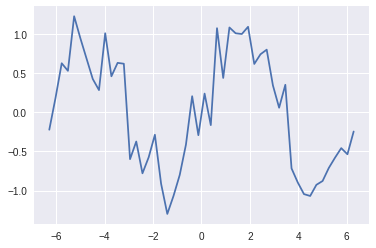

(40, 10, 1)
(40, 10, 1)


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi)
sin_data = np.sin(x_data) + 0.3*np.random.randn(len(x_data))

plt.plot(x_data, sin_data)
plt.show()

n_sample = len(x_data)-n_rnn
x = np.zeros((n_sample, n_rnn))
t = np.zeros((n_sample, n_rnn))
for i in range(0, n_sample):
  x[i] = sin_data[i:i+n_rnn]
  t[i] = sin_data[i+1:i+n_rnn+1]
  
x = x.reshape(n_sample, n_rnn, 1)
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)
print(t.shape)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


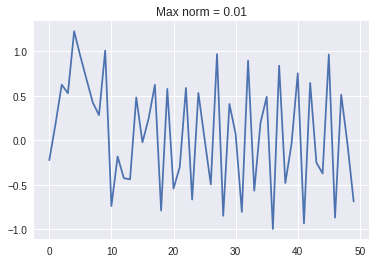

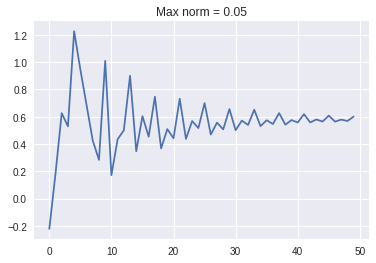

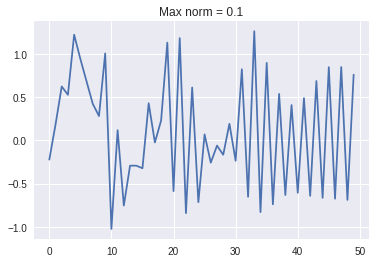

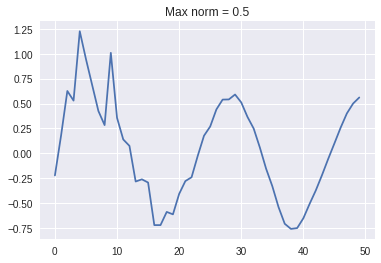

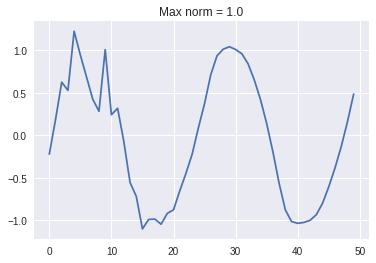

In [9]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras import optimizers

for max_norm in [0.01, 0.05, 0.1, 0.5, 1.0]: #様々なノルムの最大値で学習を行う
  model = Sequential()
  model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
  model.add(Dense(n_out, activation='linear'))
  #optimizerで勾配クリッピングの設定を行う clipnormにノルムの最大値を設定
  model.compile(loss='mean_squared_error', optimizer=optimizers.SGD(clipnorm=max_norm))
  history = model.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0) #verbose=0で経過の表示を行わない
  
  predicted = x[0].reshape(-1)
  for i in range(0, n_sample):
    y = model.predict(predicted[-n_rnn:].reshape(1, -1, 1))
    predicted = np.append(predicted, y[0][n_rnn-1][0])
    
  plt.plot(np.arange(len(predicted)), predicted)
  plt.title('Max norm = ' + str(max_norm))
  plt.show()